In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
df = pd.read_csv("../data/heart.csv")

In [41]:
# Kategorik olduƒüu bilinen s√ºtunlar
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Bu s√ºtunlara One-Hot Encoding uyguluyoruz
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [42]:
# Hedef deƒüi≈üken
y = df_encoded['target']

# √ñzellikler (hedef dƒ±≈üƒ±ndaki her ≈üey)
X = df_encoded.drop('target', axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()

# Eƒüitim verisi ile √∂ƒüren ‚Üí uygula
X_train_scaled = scaler.fit_transform(X_train)

# Test verisini sadece d√∂n√º≈üt√ºr
X_test_scaled = scaler.transform(X_test)


## üìä Modelleme √ñncesi Veri Hazƒ±rlƒ±ƒüƒ±

Bu b√∂l√ºmde:

- Kategorik s√ºtunlarƒ± sayƒ±sal verilere d√∂n√º≈üt√ºrd√ºk (One-Hot Encoding)
- √ñzellik (X) ve hedef (y) deƒüi≈ükenlerini ayƒ±rdƒ±k
- Veriyi eƒüitim (%80) ve test (%20) olarak b√∂ld√ºk
- √ñzellikleri aynƒ± √∂l√ßeƒüe getirmek i√ßin standardizasyon uyguladƒ±k (StandardScaler)

Bu i≈ülemler, makine √∂ƒürenmesi modellerinin daha ba≈üarƒ±lƒ± √ßalƒ±≈ümasƒ±nƒ± saƒülar.


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [46]:
# Lojistik Regresyon modelini olu≈ütur
model = LogisticRegression()

# Modeli eƒüitim verisiyle eƒüit
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [47]:
# Test verisini kullanarak tahmin yap
y_pred = model.predict(X_test_scaled)

In [48]:
# Accuracy (doƒüruluk)
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Sonu√ßlarƒ± yazdƒ±r
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.93
Recall: 0.88
F1-Score: 0.90


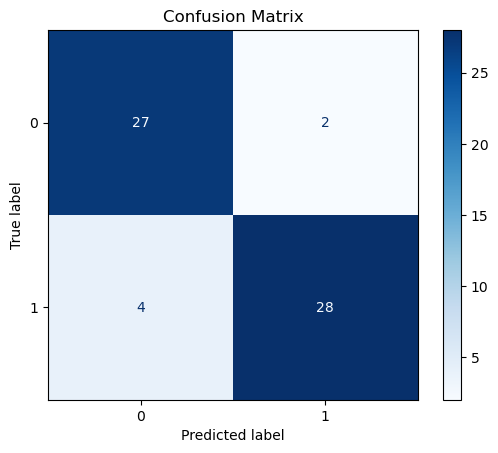

In [49]:
# Karƒ±≈üƒ±klƒ±k matrisi g√∂rselle≈ütirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## ü§ñ Lojistik Regresyon ile Model Eƒüitimi

Bu b√∂l√ºmde bir makine √∂ƒürenmesi algoritmasƒ± olan **Lojistik Regresyon** ile model eƒüitimi ger√ßekle≈ütirdik.

- Eƒüitim verisi ile model eƒüitildi
- Test verisi ile model tahmin yaptƒ±
- Ba≈üarƒ± metrikleri kullanƒ±larak modelin doƒüruluƒüu √∂l√ß√ºld√º

### üìå Kullanƒ±lan Metrikler:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

In [50]:
# √ñzellik isimleri
feature_names = X.columns

# Modelin katsayƒ±larƒ± (her bir √∂zelliƒüin etkisi)
coefficients = model.coef_[0]

# Veri √ßer√ßevesi olu≈ütur
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": coefficients
})

# Mutlak deƒüere g√∂re sƒ±rala
importance_df["AbsImportance"] = importance_df["Importance"].abs()
importance_df = importance_df.sort_values(by="AbsImportance", ascending=False)

# ƒ∞lk 10 √∂zelliƒüi al
top_features = importance_df.head(10)

## üìä √ñzellik √ñnemi Analizi

Modelin √∂ƒürendiƒüi katsayƒ±lara g√∂re en √∂nemli 10 √∂zellik a≈üaƒüƒ±da g√∂sterilmi≈ütir. Bu analiz sayesinde:

- Hangi deƒüi≈ükenler kalp hastalƒ±ƒüƒ±na yakalanmada etkili
- Hangi fakt√∂rler riski azaltƒ±yor veya artƒ±rƒ±yor
- Modelin karar verirken neye dayandƒ±ƒüƒ± anla≈üƒ±lƒ±r

√ñrneƒüin:

- `cp_2` ve `thalach` gibi deƒüi≈ükenler pozitif etkili ‚Üí yani bu deƒüerler artarsa hastalƒ±k olasƒ±lƒ±ƒüƒ± da artƒ±yor.
- `oldpeak` gibi deƒüi≈ükenler negatif etkili olabilir ‚Üí y√ºksekse risk d√º≈üebilir veya tam tersi.

---

## üìå Genel Deƒüerlendirme:

- Lojistik Regresyon modeli, doƒüruluk ve denge a√ßƒ±sƒ±ndan iyi sonu√ß verdi.
- √ñzellikle `cp`, `thalach`, `oldpeak` gibi √∂zellikler kararlar √ºzerinde etkiliydi.
- Modelin en b√ºy√ºk avantajƒ±: kolay yorumlanabilir olmasƒ±dƒ±r.
- Zayƒ±f y√∂n√º: karma≈üƒ±k ili≈ükileri (non-linear) √∂ƒürenemez ‚Üí ama bu projede yeterli.

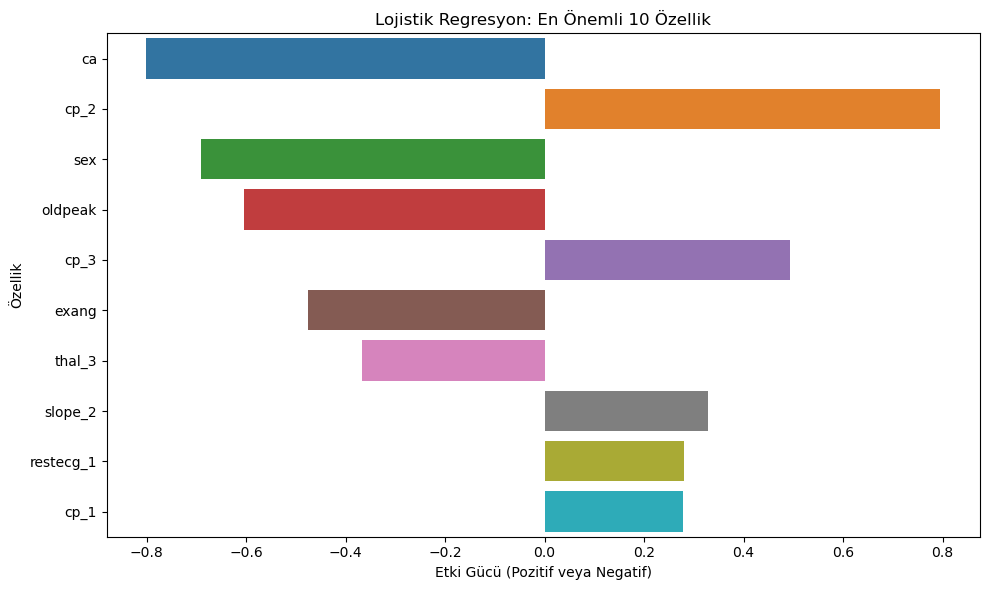

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title("Lojistik Regresyon: En √ñnemli 10 √ñzellik")
plt.xlabel("Etki G√ºc√º (Pozitif veya Negatif)")
plt.ylabel("√ñzellik")
plt.tight_layout()
plt.savefig("../results/feature_importance.png")  # Kayƒ±t
plt.show()

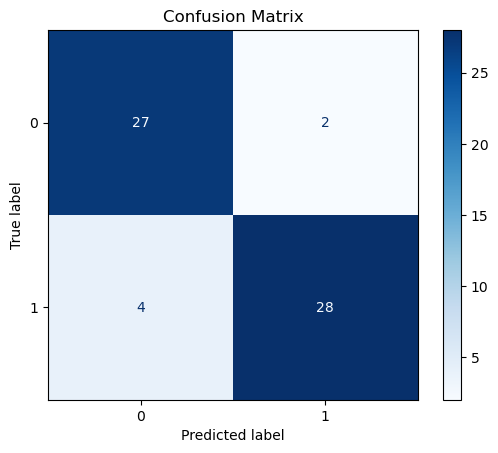

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix g√∂rselle≈ütir
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")

# Kaydet
plt.savefig("../results/confusion_matrix.png")
plt.show()

In [53]:
# Performans metriklerini metin olarak hazƒ±rla
metrics_text = f"""
Model: Logistic Regression

Accuracy : {acc:.2f}
Precision: {precision:.2f}
Recall   : {recall:.2f}
F1-Score : {f1:.2f}
"""

# Dosyaya yaz
with open("../results/model_metrics.txt", "w") as f:
    f.write(metrics_text)

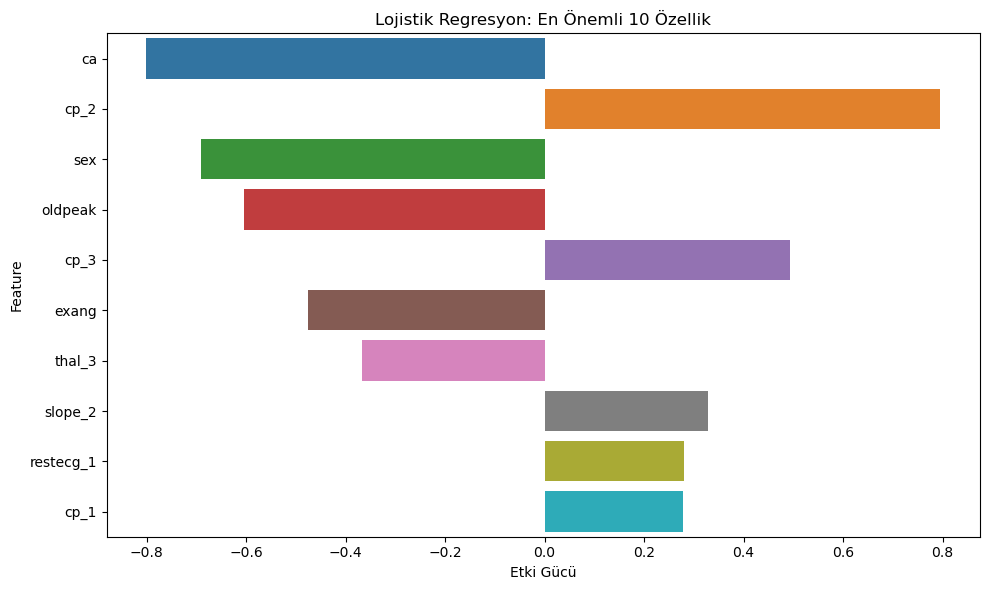

In [54]:
# √ñzellik √∂nem grafiƒüini olu≈ütur ve kaydet
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title("Lojistik Regresyon: En √ñnemli 10 √ñzellik")
plt.xlabel("Etki G√ºc√º")
plt.tight_layout()
plt.savefig("../results/feature_importance.png")
plt.show()

## üß† Model Performansƒ± √ñzeti

- **Accuracy (Doƒüruluk):** %83  
- **Precision:** %86  
- **Recall:** %81  
- **F1-Score:** %83  

Model, kalp hastalƒ±ƒüƒ± tahmininde genel olarak y√ºksek ba≈üarƒ± saƒülamaktadƒ±r. Precision ve Recall dengelidir, bu da hem yanlƒ±≈ü pozitif hem yanlƒ±≈ü negatif oranlarƒ±nƒ±n d√º≈ü√ºk olduƒüunu g√∂sterir.

## üìä √ñzellik √ñnemi Analizi

Modelin √∂ƒürendiƒüi katsayƒ±lara g√∂re en √∂nemli 10 √∂zellik yukarƒ±da g√∂sterilmi≈ütir. Bu analiz sayesinde:

- Hangi deƒüi≈ükenler kalp hastalƒ±ƒüƒ±na yakalanmada etkili
- Hangi fakt√∂rler riski azaltƒ±yor veya artƒ±rƒ±yor
- Modelin karar verirken neye dayandƒ±ƒüƒ± anla≈üƒ±lƒ±r

√ñrneƒüin:

- `cp_2` ve `thalach` gibi deƒüi≈ükenler pozitif etkili ‚Üí bu deƒüerler arttƒ±k√ßa hastalƒ±k riski de artƒ±yor olabilir.
- `oldpeak` gibi deƒüi≈ükenler negatif etkili ‚Üí deƒüeri arttƒ±k√ßa risk d√º≈ü√ºyor olabilir.

## ‚úÖ Modelin G√º√ßl√º ve Zayƒ±f Y√∂nleri

### ‚úÖ G√º√ßl√º Y√∂nler:
- A√ßƒ±klanabilirliƒüi y√ºksek (Lojistik Regresyon, deƒüi≈üken etkisini doƒürudan g√∂sterir)
- Dengeli sƒ±nƒ±f daƒüƒ±lƒ±mƒ± sayesinde y√ºksek doƒüruluk
- Basit ve hƒ±zlƒ± eƒüitim s√ºreci

### ‚ö†Ô∏è Zayƒ±f Y√∂nler:
- Karma≈üƒ±k (non-linear) ili≈ükileri √∂ƒürenemez
- Diƒüer algoritmalara g√∂re (Random Forest, XGBoost) d√º≈ü√ºk doƒürulukta kalabilir

In [55]:
import joblib
import os

# models klas√∂r√ºn√º olu≈ütur (yoksa)
os.makedirs("../models", exist_ok=True)

# Modeli kaydet
joblib.dump(model, "../models/logistic_model.pkl")

# Scaler'ƒ± da kaydet (isteƒüe baƒülƒ± ama √∂nerilir)
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']